# The Sparks Foundation #GRIPFEB21

# Prediction using Supervised ML

## By Mohak Acharya 

### Task1: Predict the percentage of an student based on the number of study hours.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_absolute_error
%matplotlib inline

####  Importing dataset 

In [2]:
# Reading csv using pandas
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')  
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
data.shape

(25, 2)

In [5]:
print(data.describe())
print(data.isnull().sum())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     0
Scores    0
dtype: int64


#### Visualizing dataset using scatter plot

Text(0, 0.5, 'Percentage obtained')

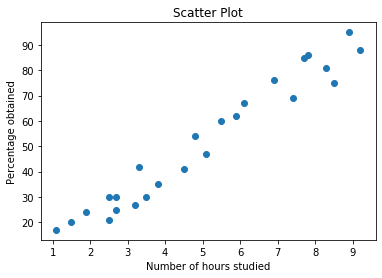

In [8]:
plt.scatter(x = data.Hours, y = data.Scores)
plt.title('Scatter Plot')  
plt.xlabel('Number of hours studied')  
plt.ylabel('Percentage obtained') 

#### Thus from above it can be seen that the dataset follows a linear relationship and hence Linear regression can be appiled to the same. 

#### Dividing the data into train and test set

In [9]:
X = data.Hours.values.reshape(data.Hours.shape[0], 1)
y = data.Scores

# Using train_test_split function with 80% data in training set and 20% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


#### Defining model for linear regression

In [11]:
mod = LinearRegression()
mod.fit(X_train, y_train)

m=mod.coef_
c=mod.intercept_
print(m)
print(c)

[9.549313]
4.0710380548162135


#### Visualizing the linear regression line against train dataset

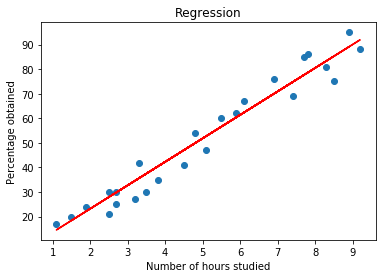

In [12]:
yl = m*X + c

plt.title('Regression')
plt.scatter(X, y)
plt.plot(X, yl, color = 'red')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage obtained')
plt.show()

#### Predicting using our model 

In [13]:
pred = mod.predict(X_test)

In [24]:
pdf = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
pdf.reset_index(inplace=True, drop=True)
pdf 

,Actual,Predicted
0,47,52.772534
1,67,62.321847
2,62,60.411985
3,21,27.944321
4,25,29.854183


In [15]:
print('Accuracy of trained model is ', mod.score(X_test, y_test))

Accuracy of trained model is  0.9260417202515396


#### Percentage score for a student who studies for 9.25 hours per day

In [17]:
tc = [[9.25]]
ans = mod.predict(tc)
print("The predicted score of a student who studies for 9.25 hours is : ", ans[0])

The predicted score of a student who studies for 9.25 hours is :  92.40218329616572


#### Evaluating the model

In [19]:
mod.score(X_test, y_test) 

print("MAE", metrics.mean_absolute_error(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test,pred))

MAE 4.767441191281206
MSE 25.90314789910077


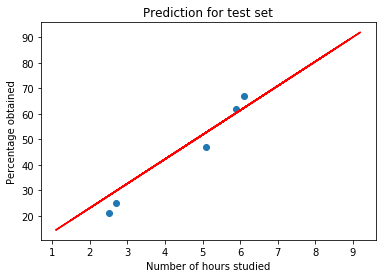

In [22]:
# Visualization for prediction vs real test set by trained model

plt.scatter(X_test,y_test)
plt.plot(X_train, mod.predict(X_train), linestyle='-', color='red')
plt.title('Prediction for test set')  
plt.xlabel('Number of hours studied')  
plt.ylabel('Percentage obtained') 
plt.show()